In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*  IMPORTING THE LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
from scipy import fftpack
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from PIL import Image
import random
from numpy import asarray
from scipy.signal import stft
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Basic data exploration**

Its clearly visible the five different sensors that are capturing signals for each sample. We have 400 samples one from every class  A,B,C,D with each sesor emitting 694 time steps.

In [3]:
df_et=pd.read_csv('/content/drive/MyDrive/Fourier/ETdata_400.csv',header=None)

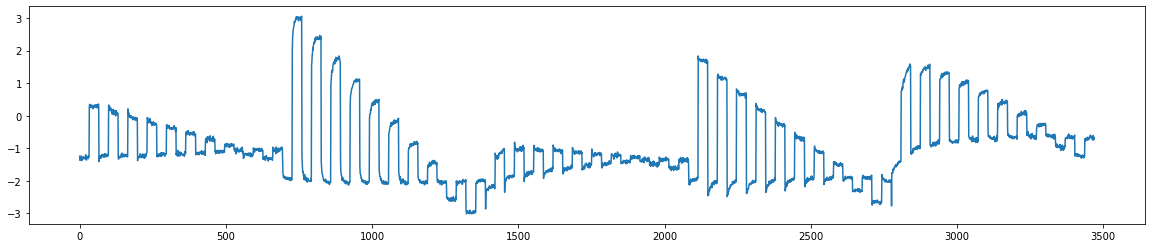

In [ ]:
class_A= df_et.iloc[0]
plt.rcParams['figure.figsize'] = [20, 4]
class_A.plot(kind='line')
fig=plt.show()
fig=plt.xlabel('E_TONGUE')
fig=plt.ylabel('AMPLITUDE')

In [4]:
df_nose=pd.read_csv('/content/drive/MyDrive/Fourier/nose_tran_400.csv',header=None)

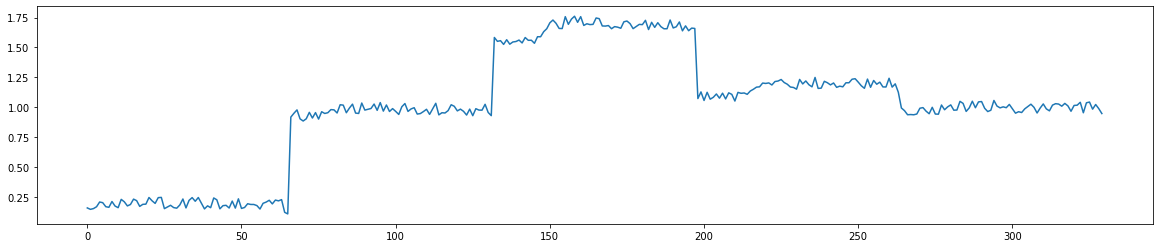

In [ ]:
class_A= df_nose.iloc[0]
plt.rcParams['figure.figsize'] = [20, 4]
class_A.plot(kind='line')
fig=plt.show()
fig=plt.xlabel('E_NOSE')
fig=plt.ylabel('AMPLITUDE')

**The five sensors are separately plotted on A vs T graph, the first 4 are from A,B,C and D class while the class of the fifth one is chosen at random.**

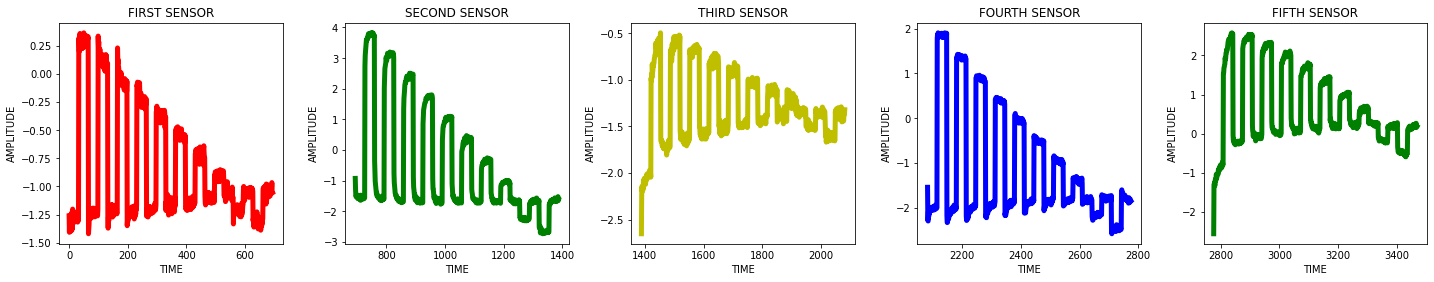

In [ ]:
class_A_s1 = df_et.iloc[1,:694]
plt.subplot(1, 5, 1) 
plt.plot(class_A_s1, 'r', linewidth=5)
plt.title('FIRST SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
 
class_B_s2=df_et.iloc[101,694:1388]
plt.subplot(1, 5, 2)
plt.plot(class_B_s2, 'g', linewidth=5)
plt.title('SECOND SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')

class_C_s3=df_et.iloc[201,1388:2082]
plt.subplot(1, 5, 3)
plt.plot(class_C_s3, 'y', linewidth=5)
plt.title('THIRD SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')

class_D_s4=df_et.iloc[301,2082:2776]
plt.subplot(1, 5, 4)
plt.plot(class_D_s4, 'b', linewidth=5)
plt.title('FOURTH SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
A=random.randint(0,399)

class_X_s5=df_et.iloc[A,2776:3470]
plt.subplot(1, 5, 5)
plt.plot(class_X_s5, 'g', linewidth=5)
plt.title('FIFTH SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
 
# space between the plots
plt.tight_layout(1)
 
# show plot
plt.show()

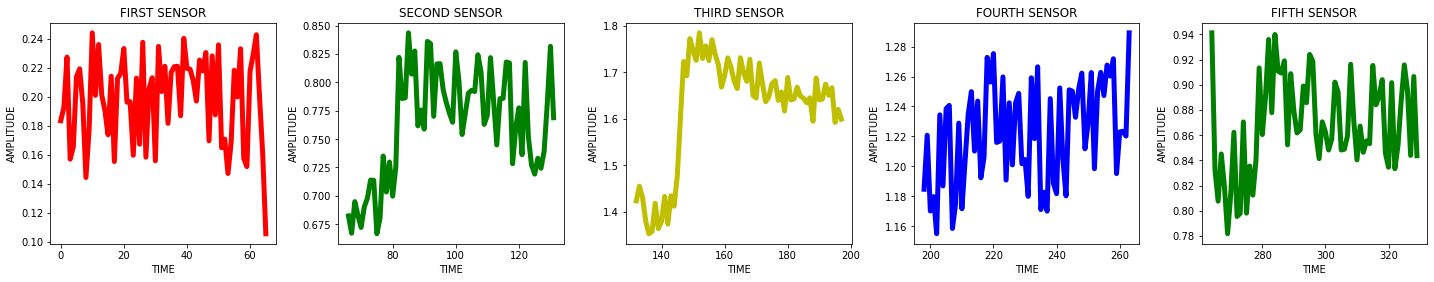

In [ ]:
class_A_s1 = df_nose.iloc[1,:66]
plt.subplot(1, 5, 1) 
plt.plot(class_A_s1, 'r', linewidth=5)
plt.title('FIRST SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
 
class_B_s2=df_nose.iloc[101,66:132]
plt.subplot(1, 5, 2)
plt.plot(class_B_s2, 'g', linewidth=5)
plt.title('SECOND SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')

class_C_s3=df_nose.iloc[201,132:198]
plt.subplot(1, 5, 3)
plt.plot(class_C_s3, 'y', linewidth=5)
plt.title('THIRD SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')

class_D_s4=df_nose.iloc[301,198:264]
plt.subplot(1, 5, 4)
plt.plot(class_D_s4, 'b', linewidth=5)
plt.title('FOURTH SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
A=random.randint(0,399)

class_X_s5=df_nose.iloc[A,264:330]
plt.subplot(1, 5, 5)
plt.plot(class_X_s5, 'g', linewidth=5)
plt.title('FIFTH SENSOR')
plt.ylabel('AMPLITUDE')
plt.xlabel('TIME')
 
# space between the plots
plt.tight_layout(1)
 
# show plot
plt.show()

# PART 1

**Fast Fourier Transform**-The Fast Fourier Transform (FFT) is a mathematical algorithm used to efficiently perform Fourier analysis of a discrete signal. The Fourier analysis is a method for expressing a signal as a sum of simpler sinusoidal components, each with its own amplitude and frequency.

The FFT was first developed by the mathematician and physicist J.W. Cooley and J. Tukey in 1965. The algorithm provides a way to calculate the Fourier coefficients of a signal in a time that is proportional to N log N, where N is the number of points in the signal. This is a significant improvement over previous methods that took time proportional to N squared, making the FFT a much more practical tool for analyzing signals in real-time applications.

Since its introduction, the FFT has been widely used in many different fields, including signal processing, image processing, and audio and speech processing. It is used in applications such as filtering, spectral analysis, and compression of digital signals, and has become a fundamental tool in many areas of science and engineering.

**PART A-**On the electronic tongue data

Viewing one sample of fourier transformed data using fast fourier transform.






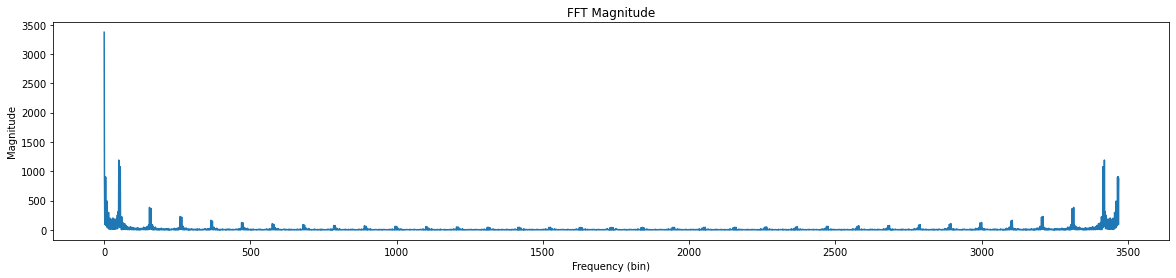

In [ ]:
fft = np.fft.fft(df_et.iloc[0])

# Plot the magnitude of the FFT
plt.plot(np.abs(fft))
plt.xlabel('Frequency (bin)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude')
plt.show()

1.   Use fast fourier transform on the signal
2.   Save the images and load them as arrays.
3.   Create a 400*4 array as y for training purpose as we know that the images are classified from 1-100-200...



In [ ]:

for i in range(400):
  arr=df_et.iloc[i].to_numpy()
  fft = np.fft.fft(arr)
  plt.plot(np.abs(fft))
  st=str(i)
  sav=st+'fft_tt.png'
  plt.savefig(sav)
  plt.clf()




<Figure size 1440x288 with 0 Axes>

In [ ]:
k=asarray(Image.open('0fft_tt.png')).reshape(288,1440,4)
for i in range(1,400):
  st=str(i)+'fft_tt.png'
  img = Image.open(st)
  numpydata = asarray(img)
  k=np.vstack((k,numpydata))

In [ ]:
x1=k.reshape(400,288,1440,4)


In [ ]:
arr=np.array([1,0,0,0]*100)
arr2=np.array([0,1,0,0]*100)
arr3=np.array([0,0,1,0]*100)
arr4=np.array([0,0,0,1]*100)
y=np.vstack((arr,arr2,arr3,arr4)).reshape(400,4)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x1, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model_fft_tongue = models.Sequential()
model_fft_tongue.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(288,1440,4)))
model_fft_tongue.add(layers.MaxPooling2D((2, 2)))
model_fft_tongue.add(layers.Conv2D(8, (2, 2), activation='relu'))
model_fft_tongue.add(layers.MaxPooling2D((2, 2)))
model_fft_tongue.add(layers.Conv2D(16, (2, 2), activation='relu'))
model_fft_tongue.add(layers.Flatten())
model_fft_tongue.add(layers.Dense(4, activation='softmax'))


In [ ]:
model_fft_tongue.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_fft_tongue.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 287, 1439, 4)      68        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 143, 719, 4)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 142, 718, 8)       136       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 71, 359, 8)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 70, 358, 16)       528       
                                                                 
 flatten_2 (Flatten)         (None, 400960)           

In [ ]:
#train the model
history_fft_tongue=model_fft_tongue.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=40, batch_size=10)

In [ ]:
results_tongue = model_fft_tongue.evaluate(X_test, y_test, batch_size=30)
print("test loss, test acc:", results_tongue)

In [ ]:
def plot_history(history, name):
    with plt.xkcd(scale=0.2):
      fig, ax = plt.subplots(1,2, figsize=(12,6))
      for i, metric in enumerate(['loss', 'accuracy']): 
          ax[i].plot(history.history[metric], label='Train', color='#EFAEA4',linewidth=3)
          ax[i].plot(history.history[f'val_{metric}'], label='Validation', color='#B2D7D0',linewidth=3)
          if metric == 'accuracy': 
            ax[i].axhline(0.5, color='#8d021f', ls='--', label='Trivial accuracy')
            ax[i].set_ylabel("Accuracy", fontsize=14)
          else:
            ax[i].set_ylabel("Loss", fontsize=14)
          ax[i].set_xlabel('Epoch', fontsize=14)

      plt.suptitle(f'{name} Training', y=1.05, fontsize=16)
      plt.legend(loc='best')
      plt.tight_layout()
plot_history(history_fft_tongue, 'FFT images  of electric tongue signals are used for')

# Inference
The model we have trained is prodcing high level of accuracy during training but is quite unstable.

**Part B**-On electronic nose data

Viewing one sample of fourier transformed data using fast fourier transform.

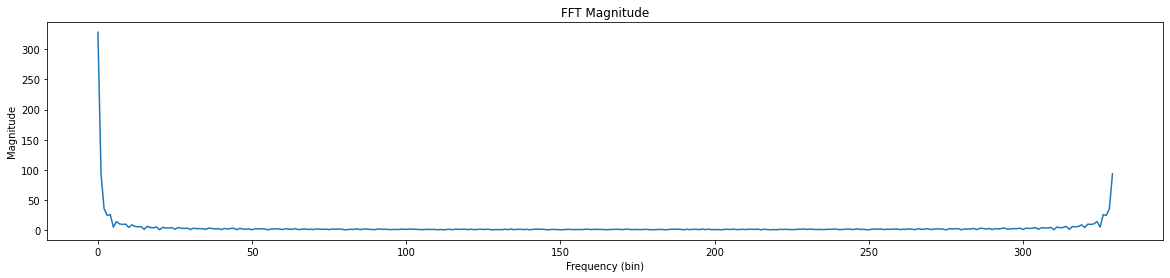

In [ ]:
fft = np.fft.fft(df_nose.iloc[0])

# Plot the magnitude of the FFT
plt.plot(np.abs(fft))
plt.xlabel('Frequency (bin)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude')
plt.show()

1.   Use fast fourier transform on the signal
2.   Save the images and load them as arrays.
3.   Create a 400*4 array as y for training purpose as we know that the images are classified from 1-100-200...



In [ ]:
for i in range(400):
  arr=df_nose.iloc[i].to_numpy()
  fft = np.fft.fft(arr)
  plt.plot(np.abs(fft))
  st=str(i)
  sav=st+'fft_nn.png'
  plt.savefig(sav)
  plt.clf()

<Figure size 1440x288 with 0 Axes>

In [ ]:
k=asarray(Image.open('0fft_nn.png')).reshape(288,1440,4)
for i in range(1,400):
  st=str(i)+'fft_nn.png'
  img = Image.open(st)
  numpydata = asarray(img)
  k=np.vstack((k,numpydata))

In [ ]:
x=k.reshape(400,288,1440,4)

In [ ]:
arr=np.array([1,0,0,0]*100)
arr2=np.array([0,1,0,0]*100)
arr3=np.array([0,0,1,0]*100)
arr4=np.array([0,0,0,1]*100)
y=np.vstack((arr,arr2,arr3,arr4)).reshape(400,4)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
model_fft_nose = models.Sequential()
model_fft_nose.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(288,1440,4)))
model_fft_nose.add(layers.MaxPooling2D((2, 2)))
model_fft_nose.add(layers.Conv2D(8, (2, 2), activation='relu'))
model_fft_nose.add(layers.MaxPooling2D((2, 2)))
model_fft_nose.add(layers.Conv2D(16, (2, 2), activation='relu'))
model_fft_nose.add(layers.Flatten())
model_fft_nose.add(layers.Dense(4, activation='softmax'))

In [ ]:
model_fft_nose.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_fft_nose.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 287, 1439, 4)      68        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 143, 719, 4)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 142, 718, 8)       136       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 71, 359, 8)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 70, 358, 16)       528       
                                                                 
 flatten_1 (Flatten)         (None, 400960)           

In [ ]:
#train the model
history_fft_nose=model_fft_nose.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=40, batch_size=10)

Epoch 1/50
32/32 [==============================] - 3s 45ms/step - loss: 866.7676 - accuracy: 0.2812 - val_loss: 229.3269 - val_accuracy: 0.2250
Epoch 2/50
32/32 [==============================] - 1s 29ms/step - loss: 48.6606 - accuracy: 0.5781 - val_loss: 3.6957 - val_accuracy: 0.7500
Epoch 3/50
32/32 [==============================] - 1s 29ms/step - loss: 1.2201 - accuracy: 0.9094 - val_loss: 0.2347 - val_accuracy: 0.9750
Epoch 4/50
32/32 [==============================] - 1s 30ms/step - loss: 0.0185 - accuracy: 0.9969 - val_loss: 0.2100 - val_accuracy: 0.9750
Epoch 5/50
32/32 [==============================] - 1s 28ms/step - loss: 0.1293 - accuracy: 0.9625 - val_loss: 0.2864 - val_accuracy: 0.9500
Epoch 6/50
32/32 [==============================] - 1s 29ms/step - loss: 0.9685 - accuracy: 0.9125 - val_loss: 0.8405 - val_accuracy: 0.8750
Epoch 7/50
32/32 [==============================] - 1s 31ms/step - loss: 2.0370 - accuracy: 0.8906 - val_loss: 0.1148 - val_accuracy: 0.9625
Epoch 8/

In [ ]:
results_nose = model_fft_nose.evaluate(X_test, y_test, batch_size=30)
print("test loss, test acc:", results_nose)

In [ ]:
def plot_history(history, name):
    with plt.xkcd(scale=0.2):
      fig, ax = plt.subplots(1,2, figsize=(12,6))
      for i, metric in enumerate(['loss', 'accuracy']): 
          ax[i].plot(history.history[metric], label='Train', color='#EFAEA4',linewidth=3)
          ax[i].plot(history.history[f'val_{metric}'], label='Validation', color='#B2D7D0',linewidth=3)
          if metric == 'accuracy': 
            ax[i].axhline(0.5, color='#8d021f', ls='--', label='Trivial accuracy')
            ax[i].set_ylabel("Accuracy", fontsize=14)
          else:
            ax[i].set_ylabel("Loss", fontsize=14)
          ax[i].set_xlabel('Epoch', fontsize=14)

      plt.suptitle(f'{name} Training', y=1.05, fontsize=16)
      plt.legend(loc='best')
      plt.tight_layout()
plot_history(history_fft_nose, 'FFT images  of electric nose signals are used for')

# Inference
The model we have trained is prodcing high level of accuracy during training but is quite unstable. 

**Part C**-We will use images of both the e_tongue and e_nose signal for our model.

In [ ]:
x1=k.reshape(400,288,1440,4)
x_scaled=pd.concat([df_nose, df_et], axis=1).to_numpy()

In [ ]:
arr=np.array([1,0,0,0]*100)
arr2=np.array([0,1,0,0]*100)
arr3=np.array([0,0,1,0]*100)
arr4=np.array([0,0,0,1]*100)
y=np.vstack((arr,arr2,arr3,arr4)).reshape(400,4)
y=np.vstack((y,y)).reshape(800,4)

We have created a dataset containing both the images of e_nose and e_tongue stacked vertically on each other, we will use this to train our classifier.

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state=42, shuffle=True)#shuffling has been done to increase stochasticity.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(4, (2, 2), activation='relu', input_shape=(288,1440,4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
#train the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=30)

Epoch 1/30
22/22 [==============================] - 4s 120ms/step - loss: 9439.8252 - accuracy: 0.2516 - val_loss: 2385.7190 - val_accuracy: 0.2188
Epoch 2/30
22/22 [==============================] - 2s 86ms/step - loss: 1234.4149 - accuracy: 0.2297 - val_loss: 578.2767 - val_accuracy: 0.3750
Epoch 3/30
22/22 [==============================] - 2s 87ms/step - loss: 178.4290 - accuracy: 0.3391 - val_loss: 57.6901 - val_accuracy: 0.3938
Epoch 4/30
22/22 [==============================] - 2s 82ms/step - loss: 16.2366 - accuracy: 0.6313 - val_loss: 2.9424 - val_accuracy: 0.7750
Epoch 5/30
22/22 [==============================] - 2s 94ms/step - loss: 2.8939 - accuracy: 0.7984 - val_loss: 0.4465 - val_accuracy: 0.9312
Epoch 6/30
22/22 [==============================] - 2s 98ms/step - loss: 0.7493 - accuracy: 0.8906 - val_loss: 0.0747 - val_accuracy: 0.9750
Epoch 7/30
22/22 [==============================] - 2s 87ms/step - loss: 0.9826 - accuracy: 0.9094 - val_loss: 0.5558 - val_accuracy: 0.89

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=30)
print("test loss, test acc:", results)

6/6 [==============================] - 0s 41ms/step - loss: 4.0476e-05 - accuracy: 1.0000
test loss, test acc: [4.047560287290253e-05, 1.0]


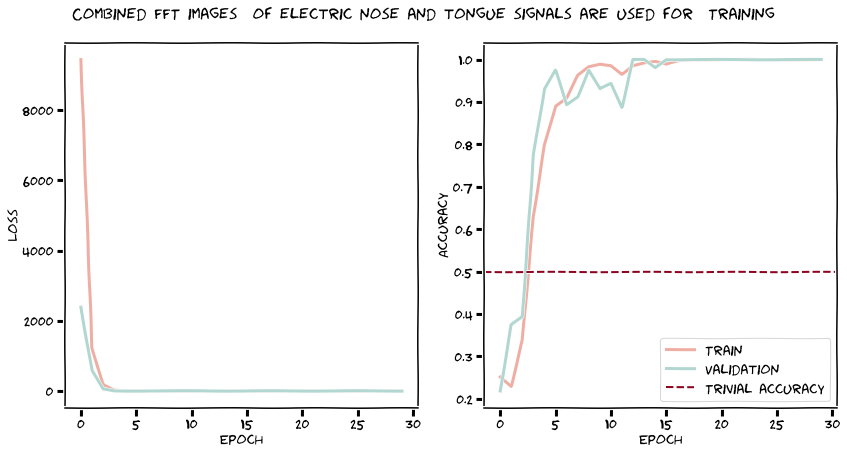

In [ ]:
def plot_history(history, name):
    with plt.xkcd(scale=0.2):
      fig, ax = plt.subplots(1,2, figsize=(12,6))
      for i, metric in enumerate(['loss', 'accuracy']): 
          ax[i].plot(history.history[metric], label='Train', color='#EFAEA4',linewidth=3)
          ax[i].plot(history.history[f'val_{metric}'], label='Validation', color='#B2D7D0',linewidth=3)
          if metric == 'accuracy': 
            ax[i].axhline(0.5, color='#8d021f', ls='--', label='Trivial accuracy')
            ax[i].set_ylabel("Accuracy", fontsize=14)
          else:
            ax[i].set_ylabel("Loss", fontsize=14)
          ax[i].set_xlabel('Epoch', fontsize=14)

      plt.suptitle(f'{name} Training', y=1.05, fontsize=16)
      plt.legend(loc='best')
      plt.tight_layout()
plot_history(history, 'Combined FFT images  of electric nose and tongue signals are used for')

# Comparison
We will be making a bar plot to show the validation accuracies of the three models.

In [ ]:
data = {'E_Tongue':results_tongue[1]*100, 'E_nose':results_nose[1]*100, 'E_nose and E_tongue':results[1]*100}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()



# Conclusion 
Both the fourier transformed image of e_nose and e_tongue were showing a high level of accuracy during training but were unstabe. We can see that by combining both the fft-images during training we are getting a stable training with nearly 100% accuracy